# Python for Padawans

This tutorial will go throughthe basic data wrangling workflow I'm sure you all love to hate, in Python! 
FYI: I come from a R background (aka I'm not a proper programmer) so if you see any formatting issues please cut me a bit of slack. 

**The aim for this post is to show people how to easily move their R workflows to Python (especially pandas/scikit)**

One thing I especially like is how consistent all the functions are. You don't need to switch up style like you have to when you move from base R to dplyr etc. 
|
And also, it's apparently much easier to push code to production using Python than R. So there's that. 

Without further ado lets load all our packages

In [1]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

#### Don't forget that %matplotlib function. Otherwise your graphs will pop up in separate windows and stop the execution of further cells. And nobody got time for that.

In [2]:
data = pd.read_csv('loan.csv', low_memory=False)
data.drop(['id', 'member_id', 'emp_title'], axis=1, inplace=True)

data.replace('n/a', np.nan,inplace=True)
data.emp_length.fillna(value=0,inplace=True)

data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)

data['term'] = data['term'].apply(lambda x: x.lstrip())

Now let's make some pretty graphs. Coming from R I definitely prefer ggplot2 but the more I use Seaborn, the more I like it. If you kinda forget about adding "+" to your graphs and instead use the dot operator, it does essentially the same stuff.

**And I've just found out that you can create your own style sheets to make life easier. Wahoo!**

But anyway, below I'll show you how to format a decent looking Seaborn graph, as well as how to summarise a given dataframe.

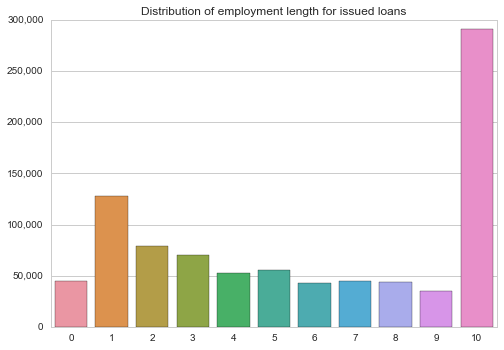

In [4]:
import seaborn as sns
import matplotlib

s = pd.value_counts(data['emp_length']).to_frame().reset_index()
s.columns = ['type', 'count']

def emp_dur_graph(graph_title):

    sns.set_style("whitegrid")
    ax = sns.barplot(y = "count", x = 'type', data=s)
    ax.set(xlabel = '', ylabel = '', title = graph_title)
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

Now before we move on, we'll look at using style sheets to customize our graphs nice and quickly.

In [3]:
import seaborn as sns
import matplotlib

print (plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


Now you can see that we've got quite a few to play with. I'm going to focus on the following styles:

- fivethirtyeight (because it's my fav website)
- seaborn-notebook
- ggplot
- classic

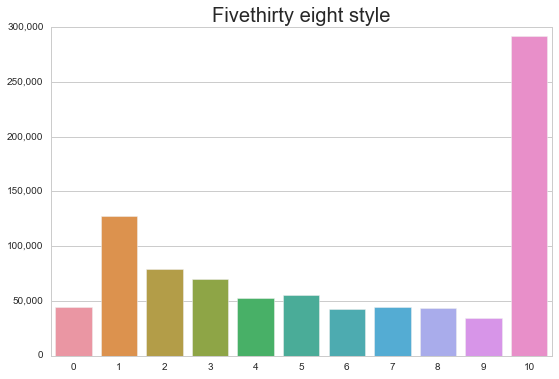

In [5]:
import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')
ax = emp_dur_graph('Fivethirty eight style')

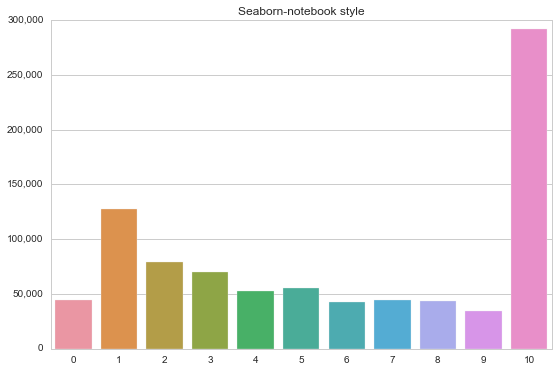

In [6]:
plt.style.use('seaborn-notebook')
ax = emp_dur_graph('Seaborn-notebook style')

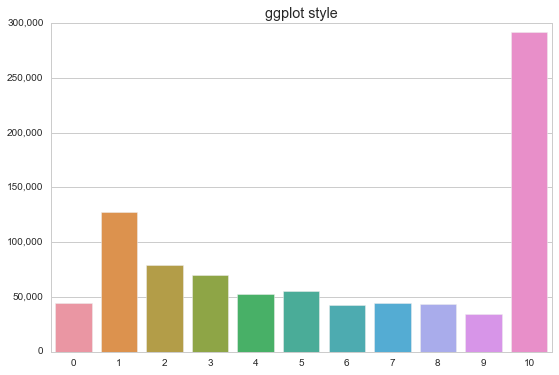

In [7]:
plt.style.use('ggplot')
ax = emp_dur_graph('ggplot style')

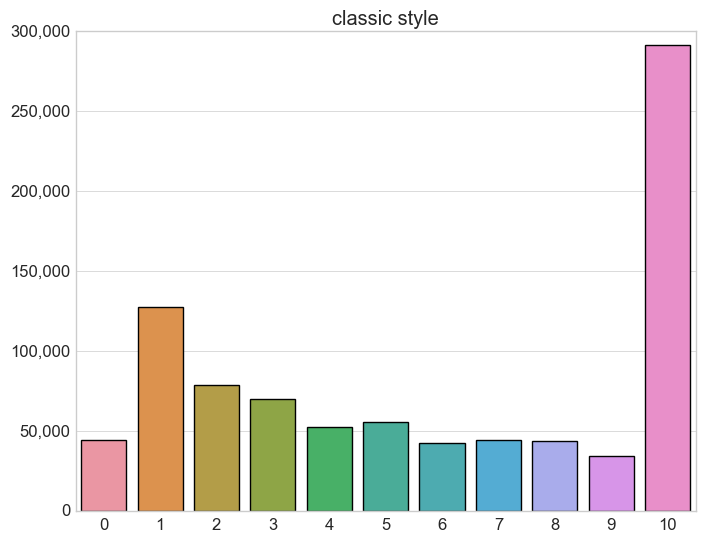

In [8]:
plt.style.use('classic')
ax = emp_dur_graph('classic style')

Now we want to looking at datetimes. Dates can be quite difficult to manipulate but it's worth the wait. Once they're formatted correctly life becomes much easier

In [3]:
import datetime

data.issue_d.fillna(value=np.nan,inplace=True)
issue_d_todate = pd.to_datetime(data.issue_d)
data.issue_d = pd.Series(data.issue_d).str.replace('-2015', '')
data.emp_length.fillna(value=np.nan,inplace=True)

data.drop(['loan_status'],1, inplace=True)

data.drop(['pymnt_plan','url','desc','title' ],1, inplace=True)

data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
import datetime as dt
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

Now I'll show you how you can build on the above data frame summaries as well as make some facet graphs.

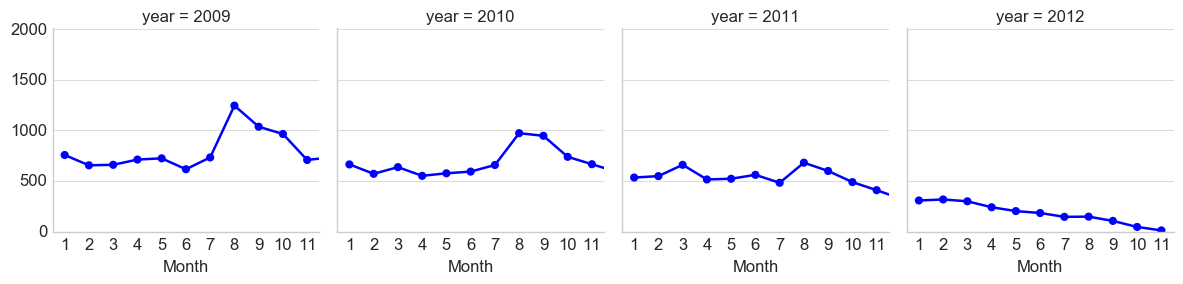

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

s = pd.value_counts(data['earliest_cr_line']).to_frame().reset_index()
s.columns = ['date', 'count']

s['year'] = s['date'].dt.year
s['month'] = s['date'].dt.month

d = s[s['year'] > 2008]

plt.rcParams.update(plt.rcParamsDefault)
sns.set_style("whitegrid")

g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d.year.max()])
plt.tight_layout()

Now I want to show you how to easily drop columns that match a given pattern. Let's drop any column that includes "mths" in it.

In [10]:
mths = [s for s in data.columns.values if "mths" in s]
mths

data.drop(mths, axis=1, inplace=True)

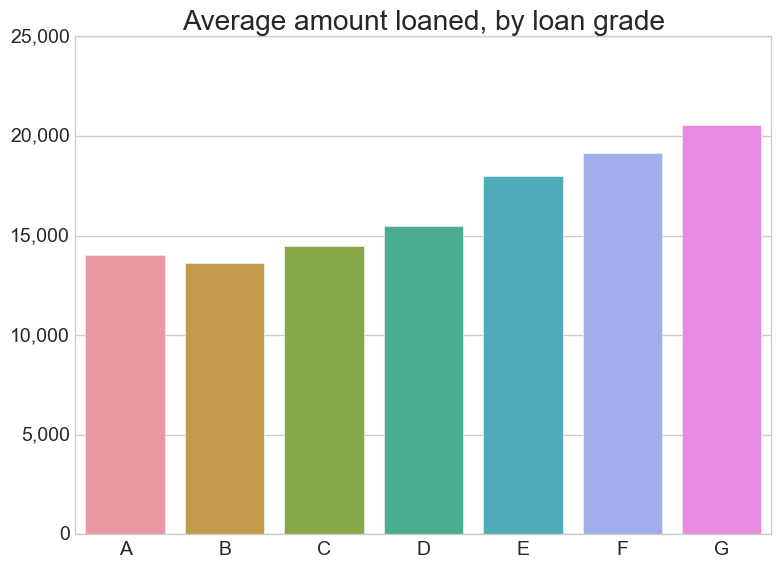

In [11]:
#1. Using groupby statements with their different calcs

group = data.groupby('grade').agg([np.mean])
loan_amt_mean = group['loan_amnt'].reset_index()

import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')

sns.set_style("whitegrid")
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

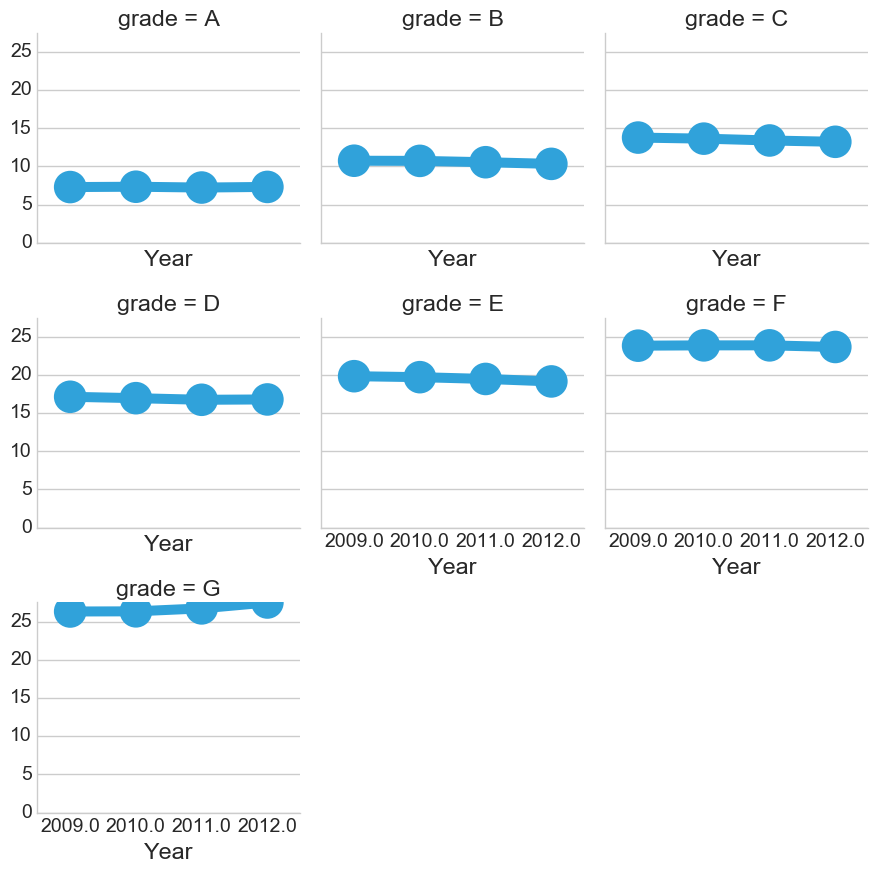

In [12]:
filtered  = data[data.earliest_cr_line_year > 2008]
group = filtered.groupby(['grade', 'earliest_cr_line_year']).agg([np.mean])

graph_df = group['int_rate'].reset_index()

plt.style.use('fivethirtyeight')
plt.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

sns.set_style("whitegrid")
g = sns.FacetGrid(graph_df, col="grade", col_wrap = 3)
g = g.map(sns.pointplot, "earliest_cr_line_year", "mean")
g.set(xlabel = 'Year', ylabel = '')
axes = plt.gca()
axes.set_ylim([0, graph_df['mean'].max()])
plt.tight_layout();

Things to be covered in future updates:

1. Handling missing values, going from just mean replacement all the way to k means
2. df.describe
3. Using the apply and vectorised functions
4. Converting a dataframe to a numpy/sklean useful format
5. Running a simple regression model

Now we have a high level understanding of the data, we'll go and try a sample modelling exercise which will cover:

- Converting our Pandas dataframe to a numpy array
- More detailed treatment of missing values
- Running a simple classification model

In [ ]:
### Now we'll look at imputing the missing values for the employment length variable
### Missing is coded as a zero.

data['emp_length'].replace(to_replace=0, value=np.nan, inplace=True, regex=True)

target = 'emp_length'
cat_variables = ['term', 'purpose', 'grade']
cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'emp_length', 'purpose', 'term']

drop_cols = cat_variables

y = pd.DataFrame(data[target])
X = data[cols]
X.drop(drop_cols, axis=1, inplace=True)
X.drop(target, axis=1, inplace=True)

cat_vars = pd.get_dummies(data[cat_variables])

X = pd.concat([X, cat_vars], axis = 1)

y['null'] = y['emp_length'].isnull()
X['null'] = y['emp_length'].isnull()

y_missing = y[y['null'] == True]
y_notmissing = y[y['null'] == False]
X_missing = X[X['null'] == True]
X_notmissing = X[X['null'] == False]

y_missing[target] = ''

dfs = y_missing, y_notmissing, X_missing, X_notmissing

for df in dfs:
    df.drop('null', inplace = True, axis = 1)
    
y_missing = y_missing.values.ravel(order='C')
y_notmissing = y_notmissing.values.ravel(order='C')
X_missing = X_missing.as_matrix()
X_notmissing = X_notmissing.as_matrix()

print X_notmissing.shape
print X_missing.shape
print y_notmissing.shape
print y_missing.shape

from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_notmissing, y_notmissing)

y_missing = logistic.predict(X_missing)

y[target][y['null'] == True] = y_missing
y[target][y['null'] == False] = y_notmissing


test = pd.DataFrame(data[target])
test['null'] = test[target].isnull()

print test['null'].value_counts()
print test['null'][test['null'] == False].value_counts()
print test['null'][test['null'] == True].value_counts()
print y_notmissing.shape
print y_missing.shape

#from pandas.util.testing import assert_frame_equal
#assert_frame_equal(pd.DataFrame(test['null'][test['null'] == False]), pd.DataFrame(y_notmissing))

data['null'] = data[target].isnull()
data[target][data['null'] == True] = y_missing

data['null_update'] = data[target].isnull()
data['null_update'].value_counts()

C:\Users\evanm_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\evanm_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\evanm_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\evanm_000\Anaconda3\envs\py27\lib\site-pack

(842554L, 27L)
(44825L, 27L)
(842554L,)
(44825L,)


In [9]:
y = data.term

cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'emp_length', 'purpose', 'earliest_cr_line_year']
X = pd.get_dummies(data[cols])

X['emp_length'].replace(to_replace=0, value=np.nan, inplace=True, regex=True)

from sklearn import preprocessing

y = y.apply(lambda x: x.lstrip())

le = preprocessing.LabelEncoder()
le.fit(y)

y = le.transform(y)
X = X.as_matrix()

In [45]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
#imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)

#http://scikit-learn.org/stable/auto_examples/missing_values.html

In [46]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)